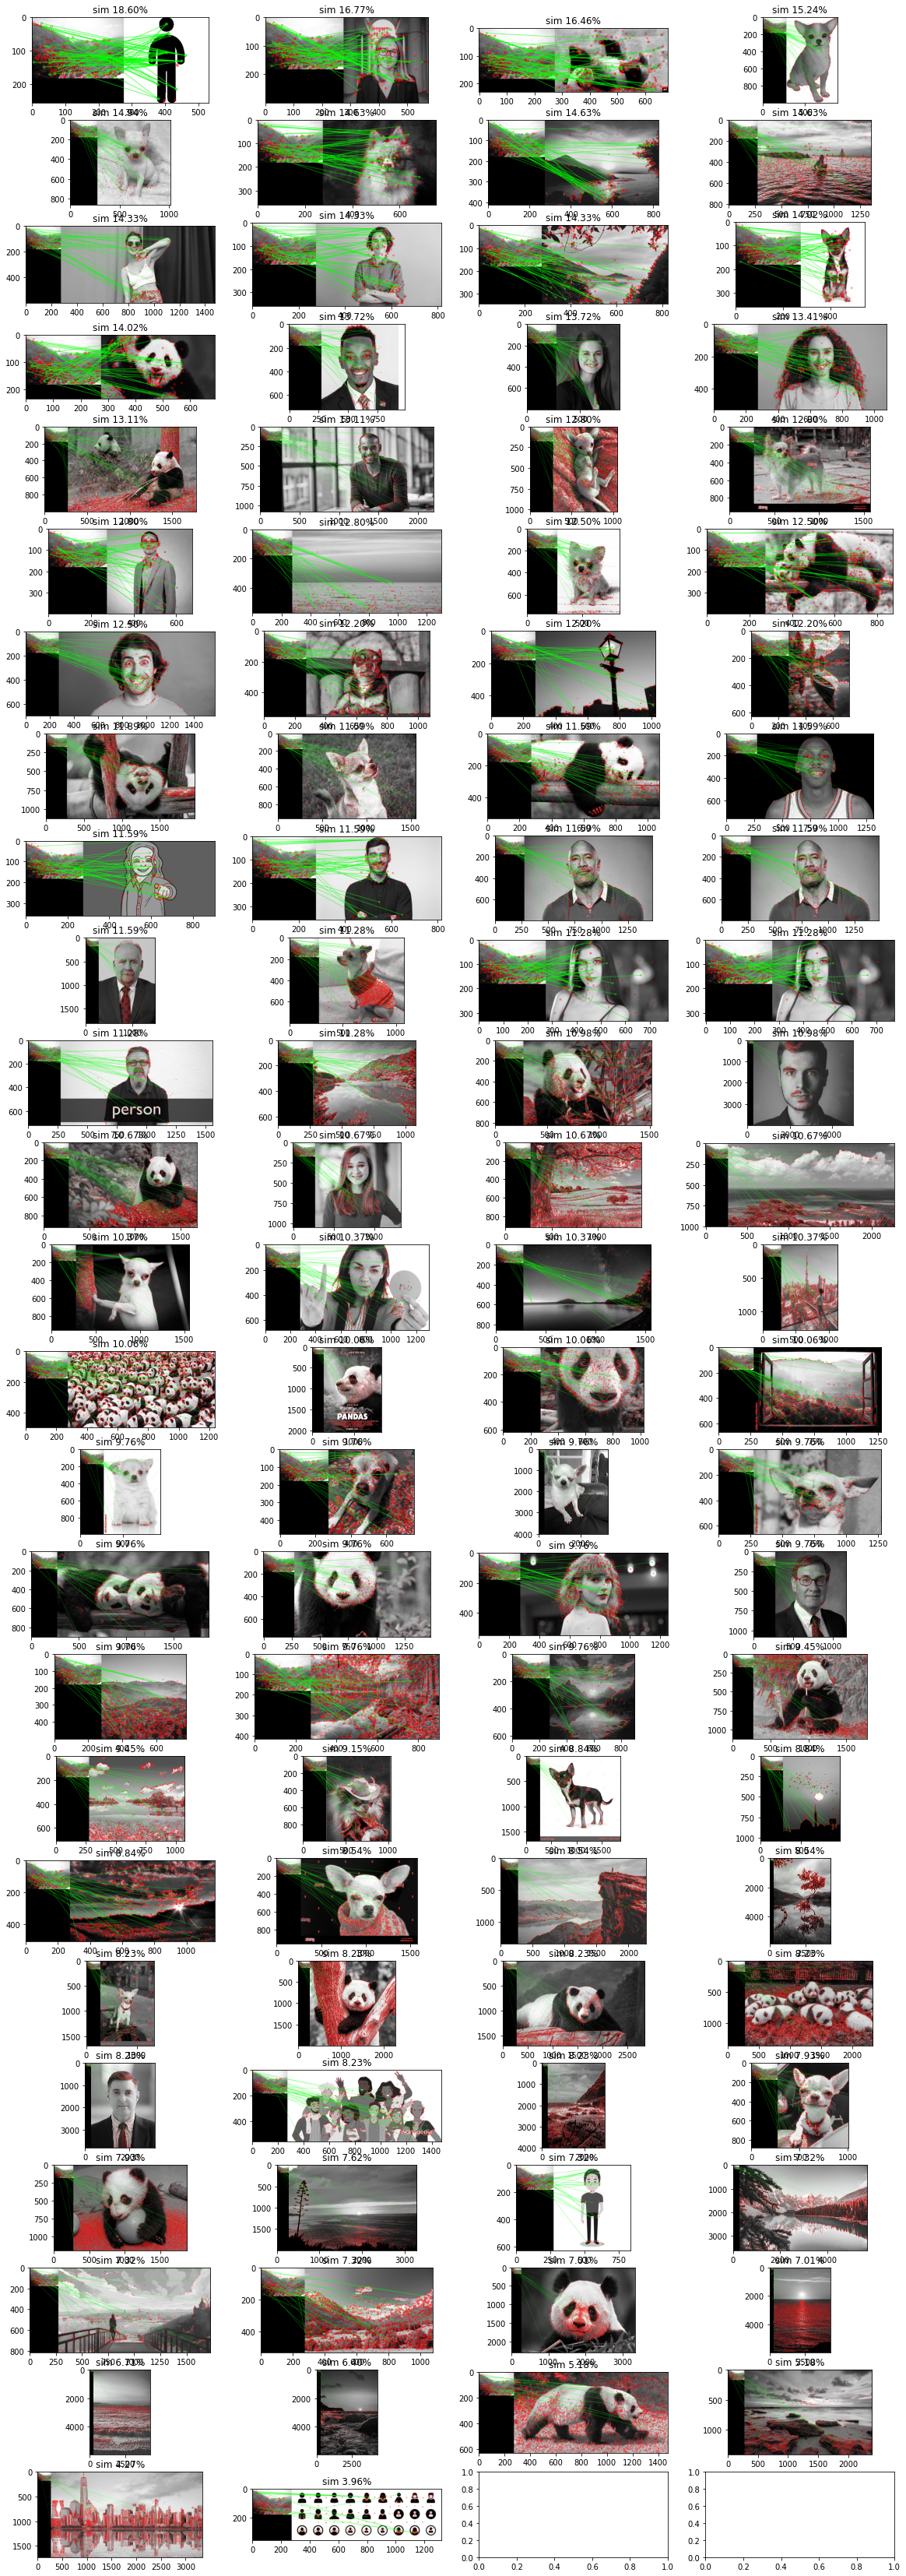

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import math


def getMatchNum(matches, ratio):
    '''返回特徵點匹配數量和匹配掩碼'''
    matchesMask = [[0, 0] for _ in range(len(matches))]
    matchNum = 0
    for i, (m, n) in enumerate(matches):
        if m.distance < ratio * n.distance:  # 將距離比率小於ratio的匹配點篩選出來
            matchesMask[i] = [1, 0]
            matchNum += 1
    return (matchNum, matchesMask)

# 圖庫路徑
queryPath = '(2)/'  
# 樣本圖片
samplePath = 'images.jpg'  
comparisonImageList = []  # 記錄比較結果

# 創建SIFT特徵提取器
sift = cv2.xfeatures2d.SIFT_create() 
# 創建FLANN匹配對象
FLANN_INDEX_KDTREE = 0
indexParams = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
searchParams = dict(checks=50)
flann = cv2.FlannBasedMatcher(indexParams, searchParams)

sampleImage = cv2.imread(samplePath, 0)
if sampleImage is None:
    print(f"Error: 無法讀取樣本圖片 {samplePath}")
else:
    kp1, des1 = sift.detectAndCompute(sampleImage, None)  # 提取樣本圖片的特徵

    for parent, dirnames, filenames in os.walk(queryPath):
        for p in filenames:
            p = os.path.join(queryPath, p)
            queryImage = cv2.imread(p, 0)
            if queryImage is None:
                print(f"Error: 無法讀取比對圖片 {p}")
                continue

            kp2, des2 = sift.detectAndCompute(queryImage, None)  # 提取比對圖片的特徵
            if des2 is None:
                print(f"Warning: 比對圖片 {p} 無法提取特徵")
                continue

            matches = flann.knnMatch(des1, des2, k=2)  # 匹配特徵點，指定k為2，這樣對樣本圖的每個特徵點，返回兩個匹配
            (matchNum, matchesMask) = getMatchNum(matches, 0.9)  # 通過比率條件，計算出匹配程度
            matchRatio = matchNum * 100 / len(matches)
            drawParams = dict(matchColor=(0, 255, 0),
                              singlePointColor=(255, 0, 0),
                              matchesMask=matchesMask,
                              flags=0)
            comparisonImage = cv2.drawMatchesKnn(sampleImage, kp1, queryImage, kp2, matches, None, **drawParams)
            comparisonImageList.append((comparisonImage, matchRatio))  # 記錄下結果

    comparisonImageList.sort(key=lambda x: x[1], reverse=True)  # 按照匹配度排序
    count = len(comparisonImageList)
    column = 4
    row = math.ceil(count / column)
    # 繪圖顯示
    figure, ax = plt.subplots(row, column, figsize=(20, 60))
    for index, (image, ratio) in enumerate(comparisonImageList):
        ax[int(index / column)][index % column].set_title('sim %.2f%%' % ratio)
        ax[int(index / column)][index % column].imshow(image)
    plt.show()

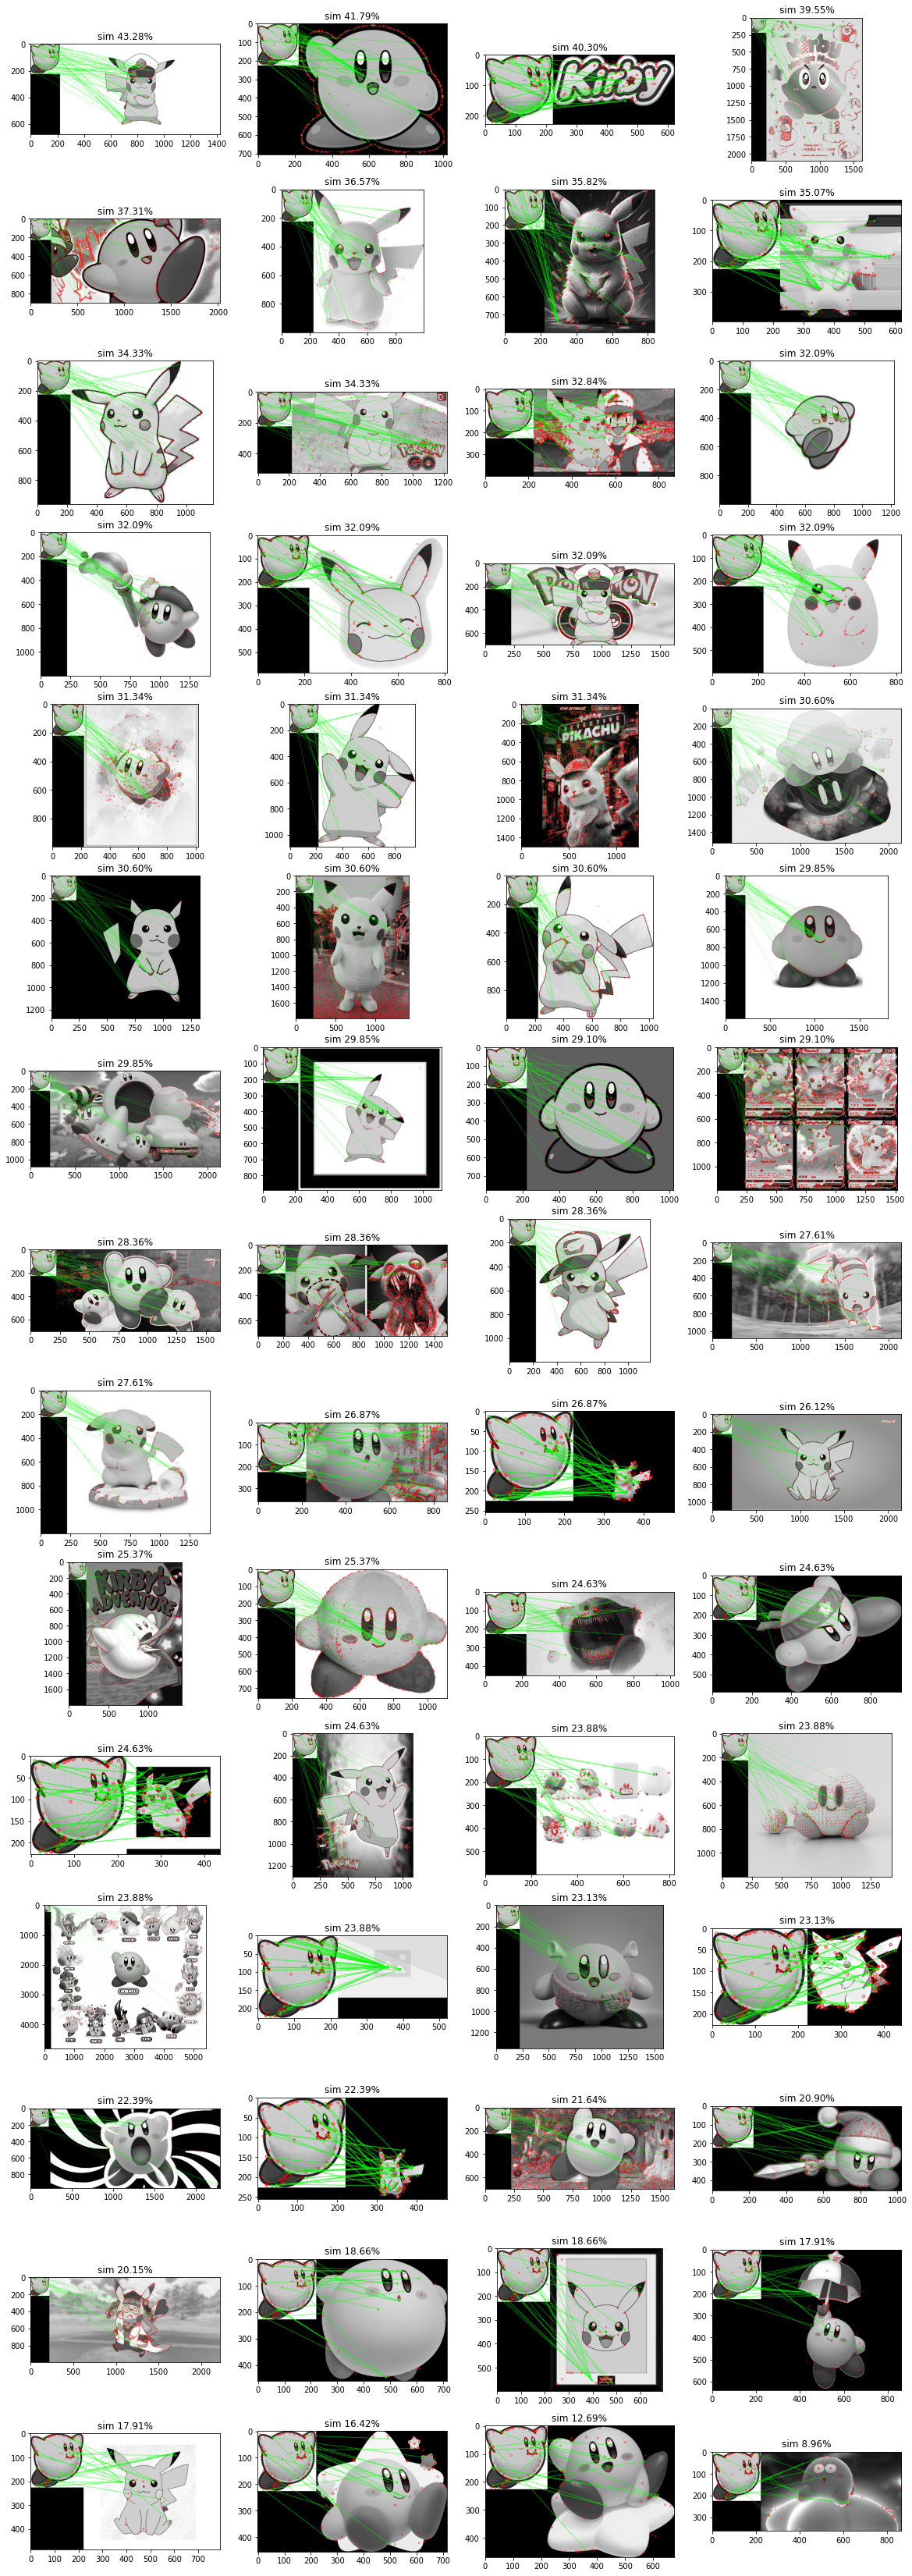

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import math


def getMatchNum(matches, ratio):
    '''返回特徵點匹配數量和匹配掩碼'''
    matchesMask = [[0, 0] for _ in range(len(matches))]
    matchNum = 0
    for i, (m, n) in enumerate(matches):
        if m.distance < ratio * n.distance:  # 將距離比率小於ratio的匹配點篩選出來
            matchesMask[i] = [1, 0]
            matchNum += 1
    return (matchNum, matchesMask)

# 圖庫路徑
queryPath = 'k&p/'  
# 樣本圖片
samplePath = 'images 1.jpg'  
comparisonImageList = []  # 記錄比較結果

# 創建SIFT特徵提取器
sift = cv2.xfeatures2d.SIFT_create() 
# 創建FLANN匹配對象
FLANN_INDEX_KDTREE = 0
indexParams = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
searchParams = dict(checks=50)
flann = cv2.FlannBasedMatcher(indexParams, searchParams)

sampleImage = cv2.imread(samplePath, 0)
if sampleImage is None:
    print(f"Error: 無法讀取樣本圖片 {samplePath}")
else:
    kp1, des1 = sift.detectAndCompute(sampleImage, None)  # 提取樣本圖片的特徵

    for parent, dirnames, filenames in os.walk(queryPath):
        for p in filenames:
            p = os.path.join(queryPath, p)
            queryImage = cv2.imread(p, 0)
            if queryImage is None:
                print(f"Error: 無法讀取比對圖片 {p}")
                continue

            kp2, des2 = sift.detectAndCompute(queryImage, None)  # 提取比對圖片的特徵
            if des2 is None:
                print(f"Warning: 比對圖片 {p} 無法提取特徵")
                continue

            matches = flann.knnMatch(des1, des2, k=2)  # 匹配特徵點，指定k為2，這樣對樣本圖的每個特徵點，返回兩個匹配
            (matchNum, matchesMask) = getMatchNum(matches, 0.9)  # 通過比率條件，計算出匹配程度
            matchRatio = matchNum * 100 / len(matches)
            drawParams = dict(matchColor=(0, 255, 0),
                              singlePointColor=(255, 0, 0),
                              matchesMask=matchesMask,
                              flags=0)
            comparisonImage = cv2.drawMatchesKnn(sampleImage, kp1, queryImage, kp2, matches, None, **drawParams)
            comparisonImageList.append((comparisonImage, matchRatio))  # 記錄下結果

    comparisonImageList.sort(key=lambda x: x[1], reverse=True)  # 按照匹配度排序
    count = len(comparisonImageList)
    column = 4
    row = math.ceil(count / column)
    # 繪圖顯示
    figure, ax = plt.subplots(row, column, figsize=(20, 60))
    for index, (image, ratio) in enumerate(comparisonImageList):
        ax[int(index / column)][index % column].set_title('sim %.2f%%' % ratio)
        ax[int(index / column)][index % column].imshow(image)
    plt.show()
